In [2]:
#参考 https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
# date: 21.08.31


# bBasic module 
import matplotlib.pyplot as plt
import sys,os,re,glob
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
import seaborn as sns

# Deep Learning modules
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader

In [5]:
# trainsform 
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]
)
# dataset
train_set = torchvision.datasets.FashionMNIST("../dat/data", download=True, train=True,transform = transform)
test_set = torchvision.datasets.FashionMNIST("../dat/data", download=True, train=False,transform = transform)

# dataloader
train_loader = DataLoader(train_set, batch_size = 4, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size = 4, shuffle=False, num_workers=2)

Extracting ../dat/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../dat/data/FashionMNIST/raw


Extracting ../dat/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../dat/data/FashionMNIST/raw


Extracting ../dat/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../dat/data/FashionMNIST/raw




Extracting ../dat/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../dat/data/FashionMNIST/raw
Processing...
Done!


In [6]:
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [9]:
# model class 

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*4*4,120) # 256 -> 120
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [10]:
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001,momentum=0.9)

In [14]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('../runs/fashion_mnist_experiment_1')
writer

In [16]:
# writeing to Tensor board
data_iter = iter(train_loader)
images, labels = data_iter.next()

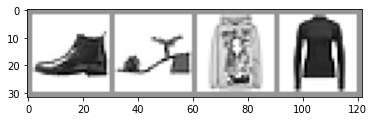

In [21]:
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

In [22]:
writer.add_image("four_fashion_mnist_images", img_grid)

In [ ]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.5.0 at http://localhost:6006/ (Press CTRL+C to quit)
